In [26]:
!cp "/content/drive/MyDrive/imp docs/ML_Review data.csv" /content/.

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [123]:
review_data_raw = pd.read_csv("ML_Review data.csv")
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(review_data_raw['Review'])
vectorizer.get_feature_names_out()

array(['average', 'bad', 'battery', 'camera', 'disappointing', 'dreadful',
       'excellent', 'expectations', 'good', 'had', 'higher', 'is', 'life',
       'mediocre', 'nice', 'okay', 'outstanding', 'overall', 'perfect',
       'performance', 'poor', 'price', 'product', 'purchase', 'quality',
       'quite', 'satisfactory', 'satisfied', 'screen', 'terrible', 'the',
       'this', 'with', 'worst'], dtype=object)

In [124]:
import numpy as np

In [125]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [126]:
from nltk.tokenize import word_tokenize
response =  vectorizer.transform(review_data_raw['Review'])


In [127]:
feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]

n = 50
top_n = feature_array[tfidf_sorting][:n]

In [128]:
top_n

array(['satisfactory', 'nice', 'quite', 'the', 'is', 'with', 'satisfied',
       'purchase', 'life', 'battery', 'performance', 'screen', 'price',
       'camera', 'quality', 'this', 'excellent', 'expectations', 'worst',
       'dreadful', 'disappointing', 'had', 'bad', 'good', 'outstanding',
       'higher', 'mediocre', 'okay', 'overall', 'perfect', 'poor',
       'product', 'terrible', 'average', 'bad', 'poor', 'the', 'is',
       'had', 'higher', 'expectations', 'battery', 'life', 'performance',
       'quality', 'camera', 'worst', 'good', 'nice', 'excellent'],
      dtype=object)

Out of the top occuring words we can keep ['satisfactory', 'nice',  'satisfied','excellent', 'expectations', 'worst',
       'dreadful','disappointing', 'bad', 'good', 'outstanding',
       'higher', 'mediocre', 'okay',  'perfect', 'poor',
       'terrible', 'average', 'bad', 'poor',
        'worst', 'good', 'nice', 'excellent']

In [129]:
sentiment_words = ['satisfactory', 'nice',  'satisfied','excellent', 'expectations', 'worst',
       'dreadful','disappointing', 'bad', 'good', 'outstanding',
       'higher', 'mediocre', 'okay',  'perfect', 'poor',
       'terrible', 'average']

In [130]:

for word in sentiment_words:
    review_data_raw[word] = review_data_raw['Review'].apply(lambda x : 1 if word in x.lower() else 0)



In [131]:
review_data_raw

,ProductID,Review,battery life,camera quality,screen,performance,price,Rating,satisfactory,nice,...,bad,good,outstanding,higher,mediocre,okay,perfect,poor,terrible,average
0,P001,The battery life is good. The camera quality i...,1,1,0,1,0,4,0,1,...,0,1,0,0,0,0,0,0,0,0
1,P001,"Overall, this product is excellent.",0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,P001,The battery life is disappointing. The screen ...,1,0,1,1,0,2,0,0,...,1,0,0,1,0,0,0,0,0,0
3,P001,The screen is satisfactory. The performance is...,0,0,1,1,1,4,1,1,...,0,0,0,0,0,0,0,0,0,0
4,P001,The screen is terrible. The price is the worst...,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P020,The battery life is perfect. The camera qualit...,1,1,1,0,0,5,0,0,...,0,0,0,0,0,0,1,0,0,0
9996,P020,The screen is okay. I had higher expectations.,0,0,1,0,0,3,0,0,...,0,0,0,1,0,1,0,0,0,0
9997,P020,The camera quality is outstanding. The screen ...,0,1,1,1,0,5,0,0,...,0,0,1,0,0,0,1,0,0,0
9998,P020,The battery life is bad. The camera quality is...,1,1,0,1,0,2,0,0,...,1,0,0,1,0,0,0,1,0,0


In [132]:
review_data_corr = review_data_raw[sentiment_words+['Rating']]

In [133]:
correlation = review_data_corr.corr()['Rating'].sort_values()

In [134]:
import seaborn as sns

In [135]:
correlation_df = pd.DataFrame(
    {
        "correlation":correlation.values
    }
)
correlation_df.index = correlation.index

In [136]:
correlation_df

,correlation
expectations,-0.826964
higher,-0.826964
terrible,-0.501673
dreadful,-0.479791
worst,-0.472905
disappointing,-0.350446
poor,-0.339824
bad,-0.339180
average,-0.129240
okay,-0.128112


<Axes: >

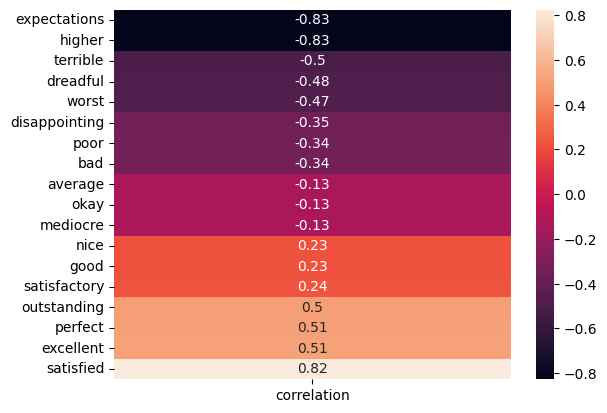

In [137]:
sns.heatmap(correlation_df[:-1], annot=True)


negative value suggest that the words are inversaly correlated to the rating

this means that expectations, dreadful,worst , disappointing are related to lower ratings
and satisfied , excellent , outsanding are related to higher ratings

In [138]:
# **Part 3: Predicting Ratings Using Machine Learning (1 hour)**

# - Leverage features from sentiment analysis and the presence of sentiment indicators to build a predictive model for product ratings.
# - Split the dataset into training and testing sets to validate the model's performance.
# - Assess the model's accuracy and explore areas for improvement.

In [139]:
# train test split
from sklearn.model_selection import train_test_split
train_reviews , test_reviews = train_test_split(review_data_corr, test_size=0.33, random_state=42 , stratify=review_data_raw['Rating'])

In [140]:
train_reviews

,satisfactory,nice,satisfied,excellent,expectations,worst,dreadful,disappointing,bad,good,outstanding,higher,mediocre,okay,perfect,poor,terrible,average,Rating
9162,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
5823,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5
5446,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
431,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5
1704,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,3
4426,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1
3212,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
7917,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5


In [141]:
# Lets train a simmple linear regression model

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
X = train_reviews.drop(['Rating'],axis=1)
y = train_reviews['Rating']
reg = LinearRegression().fit(X, y)

In [144]:
reg.score(X, y)

0.9442018007060784

In [145]:
X = test_reviews.drop(['Rating'],axis=1)
y = test_reviews['Rating']
y_pred = reg.predict(X)

In [146]:
y_pred

array([4.16218526, 4.02688749, 1.05248222, ..., 2.94928162, 4.16218526,
       3.22871892])

In [147]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)**0.5

0.2842503304261318

The error in the model isn 0.28 in the scale of 1 to 5, which is acceptable in my opinion.